## Prawdopodobieństwo blokady w sieciach z jedną usługą

In [11]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
a_list = np.arange(0.2, 1.21, 0.1)
V = 10
a_list

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2])

In [13]:
def oblicz_E(a_list, V):
    wyniki = []
    for a in a_list:
        A = a*V
        licznik = (A**V)/factorial(V, exact=False)
        mianownik = np.sum([(A**k) / factorial(k, exact=False) for k in range(V+1)])
        E = licznik/mianownik
        wyniki.append(E)
    return wyniki

In [14]:
wyniki_E = oblicz_E(a_list, V)
wyniki_E

[np.float64(3.819016794126353e-05),
 np.float64(0.0008103880858500023),
 np.float64(0.005307548873895186),
 np.float64(0.01838457033664815),
 np.float64(0.04314183841043929),
 np.float64(0.07874088296957034),
 np.float64(0.12166106425295169),
 np.float64(0.16796322629158655),
 np.float64(0.21458234310734736),
 np.float64(0.2595803278680201),
 np.float64(0.3019250402863795)]

<Axes: >

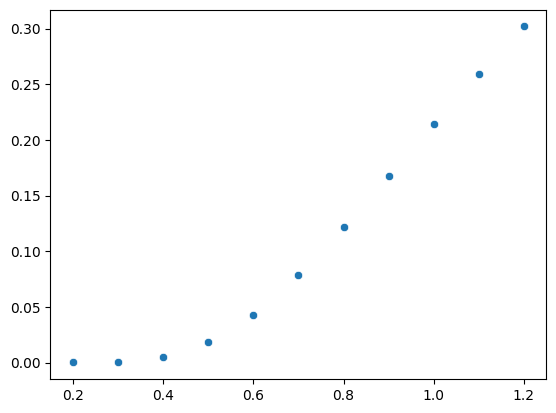

In [15]:
sns.scatterplot(x=a_list, y=wyniki_E)

In [16]:
V_list = np.arange(10, 26, 1)
V_list

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

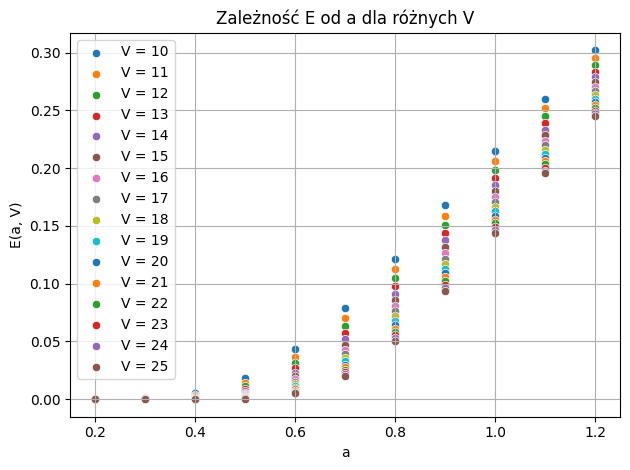

In [17]:
for V in V_list:
    wartosci_E = oblicz_E(a_list, V)
    sns.scatterplot(x=a_list, y=wartosci_E, label=f'V = {V}')
plt.xlabel("a")
plt.ylabel("E(a, V)")
plt.title("Zależność E od a dla różnych V")
plt.legend()
plt.grid(True)
plt.tight_layout()


Implementacja Engset

In [ ]:
def oblicz_E_engset(a_list, V):
    wyniki = []
    for a in a_list:
        A = a*V
        licznik = (A**V)/factorial(V, exact=False)
        mianownik = np.sum([(A**k) / factorial(k, exact=False) for k in range(V+1)])
        E = licznik/mianownik
        wyniki.append(E)
    return wyniki

Implementacja Pascal

In [ ]:
def oblicz_E_pascal(a_list, V):
    wyniki = []
    for a in a_list:
        A = a*V
        licznik = (A**V)/factorial(V, exact=False)
        mianownik = np.sum([(A**k) / factorial(k, exact=False) for k in range(V+1)])
        E = licznik/mianownik
        wyniki.append(E)
    return wyniki